# Handling Missing Numerical Data

 **Imputation (Filling Missing Data)**
 
 **a. Mean Imputation**

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [3]:
# Load Titanic dataset
df = sns.load_dataset('titanic')

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


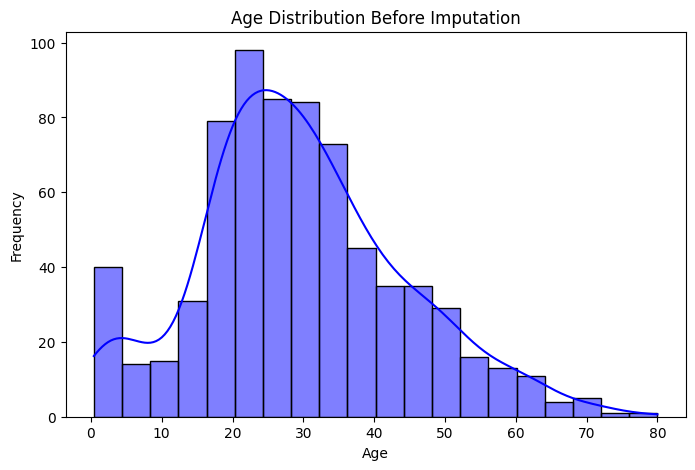

In [4]:
# Plot Age distribution before imputation
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, color='blue')
plt.title("Age Distribution Before Imputation")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**Mean Imputation**

**Without Scikit-learn**

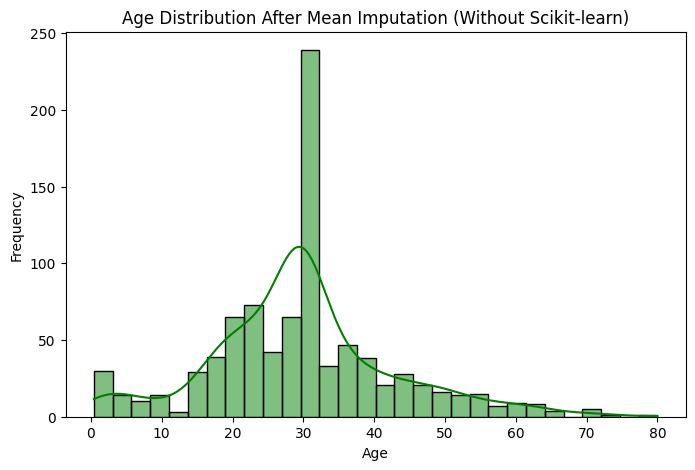

In [5]:
# Mean Imputation without Scikit-learn
df['age_mean'] = df['age'].fillna(df['age'].mean())

# Plot Age distribution after Mean Imputation
plt.figure(figsize=(8, 5))
sns.histplot(df['age_mean'], kde=True, color='green')
plt.title("Age Distribution After Mean Imputation (Without Scikit-learn)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**With Scikit-learn**

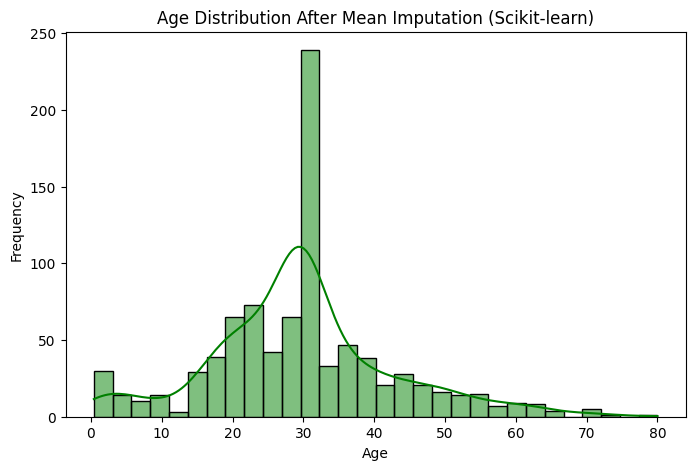

In [6]:
# Mean Imputation with Scikit-learn
mean_imputer = SimpleImputer(strategy='mean')
df['age_mean_sklearn'] = mean_imputer.fit_transform(df[['age']])

# Plot Age distribution after Mean Imputation (Scikit-learn)
plt.figure(figsize=(8, 5))
sns.histplot(df['age_mean_sklearn'], kde=True, color='green')
plt.title("Age Distribution After Mean Imputation (Scikit-learn)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_mean_sklearn
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0


**Median Imputation**

**Without Scikit-learn**

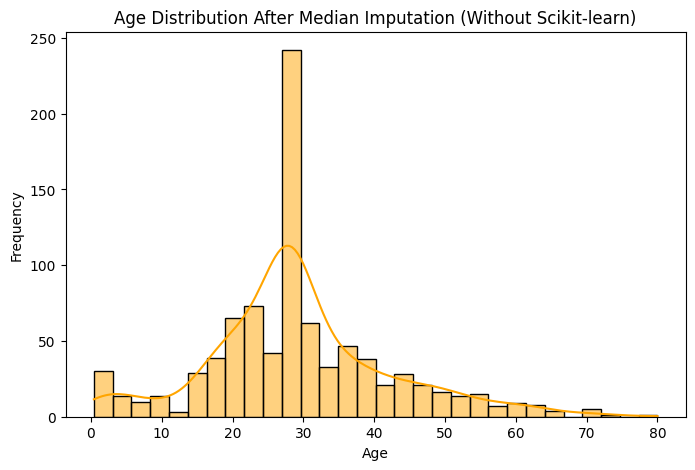

In [8]:
# Median Imputation without Scikit-learn
df['age_median'] = df['age'].fillna(df['age'].median())

# Plot Age distribution after Median Imputation
plt.figure(figsize=(8, 5))
sns.histplot(df['age_median'], kde=True, color='orange')
plt.title("Age Distribution After Median Imputation (Without Scikit-learn)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**With Scikit Learn**

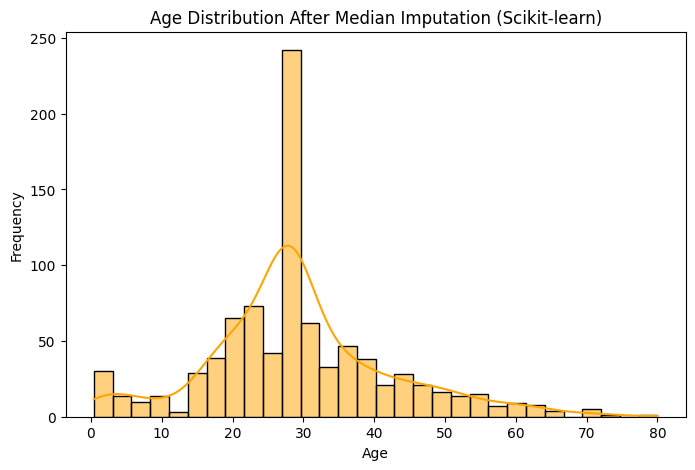

In [9]:
# Median Imputation with Scikit-learn
median_imputer = SimpleImputer(strategy='median')
df['age_median_sklearn'] = median_imputer.fit_transform(df[['age']])

# Plot Age distribution after Median Imputation (Scikit-learn)
plt.figure(figsize=(8, 5))
sns.histplot(df['age_median_sklearn'], kde=True, color='orange')
plt.title("Age Distribution After Median Imputation (Scikit-learn)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

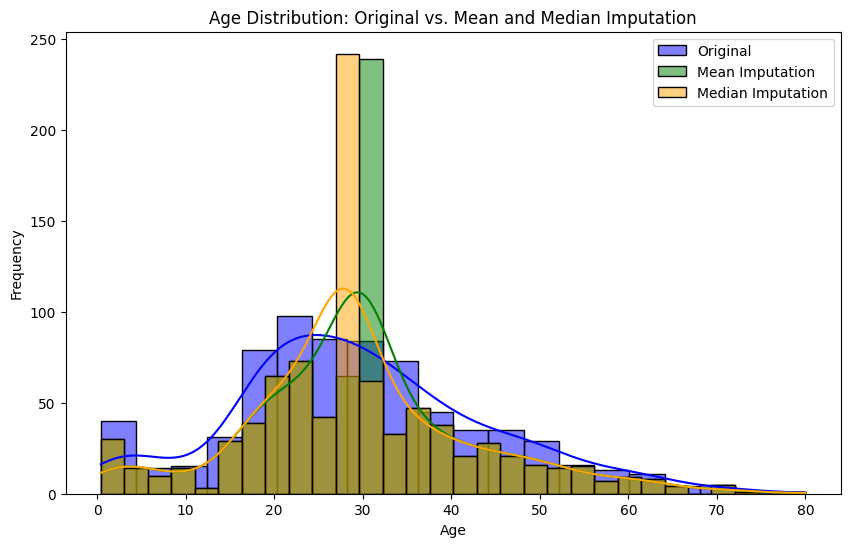

In [10]:
# Plot original, mean, and median imputed values together for comparison
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='blue', label='Original')
sns.histplot(df['age_mean'], kde=True, color='green', label='Mean Imputation')
sns.histplot(df['age_median'], kde=True, color='orange', label='Median Imputation')
plt.title("Age Distribution: Original vs. Mean and Median Imputation")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Correlation Matrix:
              age      fare    pclass
age     1.000000  0.096067 -0.369226
fare    0.096067  1.000000 -0.549500
pclass -0.369226 -0.549500  1.000000


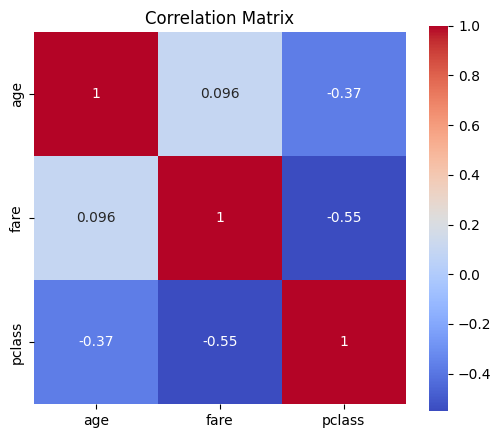

In [11]:
# Calculate correlation matrix
corr_matrix = df[['age', 'fare', 'pclass']].corr()
print("Correlation Matrix:\n", corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

Covariance Matrix:
                age         fare     pclass
age     211.019125    73.849030  -4.496004
fare     73.849030  2469.436846 -22.830196
pclass   -4.496004   -22.830196   0.699015


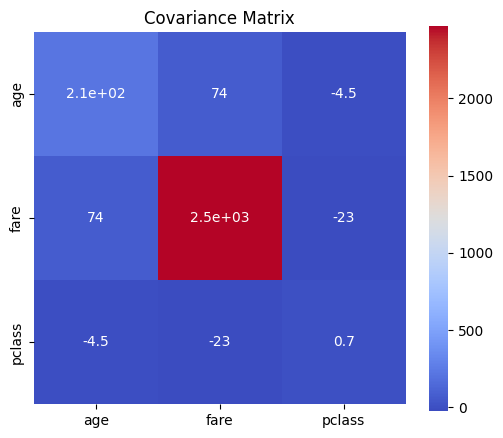

In [12]:
# Calculate covariance matrix
cov_matrix = df[['age', 'fare', 'pclass']].cov()
print("Covariance Matrix:\n", cov_matrix)

# Visualize the covariance matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Covariance Matrix")
plt.show()